In [1]:
import pandas as pd
import numpy as np
sd = pd.read_csv('poll_data.csv')
pp = pd.read_csv('3425_data.csv')
from sklearn import preprocessing 
import string


In [2]:
mini = pp
mini = mini.drop(['A4A5_agg','srcid', 'Mode', 'undecided_voter', 'opinionated'] , axis=1)

In [3]:
# Define the function to remove the punctuation

# Apply to the DF series
for n in list(mini.columns):
    mini[n] = mini[n].apply(lambda x: str(x).replace("”",""))
    mini[n] = mini[n].apply(lambda x: str(x).replace(" ",""))
    mini[n] = mini[n].apply(lambda x: str(x).replace("nan",""))

In [4]:
nan_value = float("NaN")

mini = mini.replace("", nan_value)
mini = mini.dropna(axis=1)
mini = mini.dropna(axis=0)
mini
#mini.to_csv('cleaned_ug.csv')

,A1,A2,A4_a,A4_b,A4_c,A4_d,A4_e,A5_a,A5_b,A5_c,...,E1_c,E1_d,E1_e,E1_f,E1_g,E1_h,E10,E14,p_volunteer,p_gender_sdc
0,2,3,2,2,2,2,2,2,4,4,...,2,2,2,2,1,-99,1,2,1,2
1,2,1,2,2,2,1,3,2,4,4,...,2,2,2,1,2,1,7,2,1,2
2,4,3,4,2,3,2,2,2,3,4,...,2,2,2,2,1,1,1,2,1,1
3,2,3,2,2,1,1,1,4,4,5,...,2,2,2,1,1,1,4,2,2,2
4,1,3,2,1,3,1,1,1,2,1,...,2,2,2,1,1,-98,7,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,4,3,3,3,3,3,2,4,3,4,...,2,2,2,2,1,2,1,2,1,1
3151,2,1,2,2,2,2,2,3,4,4,...,2,2,2,2,2,2,1,1,2,1
3152,2,3,3,3,2,2,2,2,2,1,...,2,2,2,2,2,2,1,2,2,2
3153,2,1,2,2,2,2,1,3,3,3,...,2,2,2,2,2,2,1,1,2,1


In [5]:
feature_cols = list(mini.columns)
feature_cols
feature_cols.remove('A2')
X =  mini[feature_cols] # Features
y = mini['A2']# Target variable
print(X.shape)
print(y.shape)


(3155, 53)
(3155,)


In [6]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import sklearn

In [14]:
# label for encoding then make the contingency table for test and train data
from sklearn.preprocessing import LabelEncoder
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
X_train.apply(LabelEncoder().fit_transform)
X_test.apply(LabelEncoder().fit_transform)
X.apply(LabelEncoder().fit_transform)
X_train = pd.get_dummies(X_train)
X_test =  pd.get_dummies(X_test)
X = pd.get_dummies(X)
feature_cols = list(X_train.columns)


In [12]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=2, min_samples_split=20, min_samples_leaf=10)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [13]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.4952481520591341


In [ ]:
cf = pd.DataFrame(sklearn.metrics.confusion_matrix(y_test, y_pred))
cf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,0,20,0,0,0,0,0,0,0,0,12,0,1,0,0,0,0,0
1,0,0,11,0,0,0,0,0,0,0,0,3,0,2,0,0,0,0,0
2,0,0,280,0,0,0,0,0,0,0,0,48,0,4,0,0,0,0,0
3,0,0,7,0,0,0,0,0,0,0,0,7,0,3,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
5,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
7,0,0,25,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


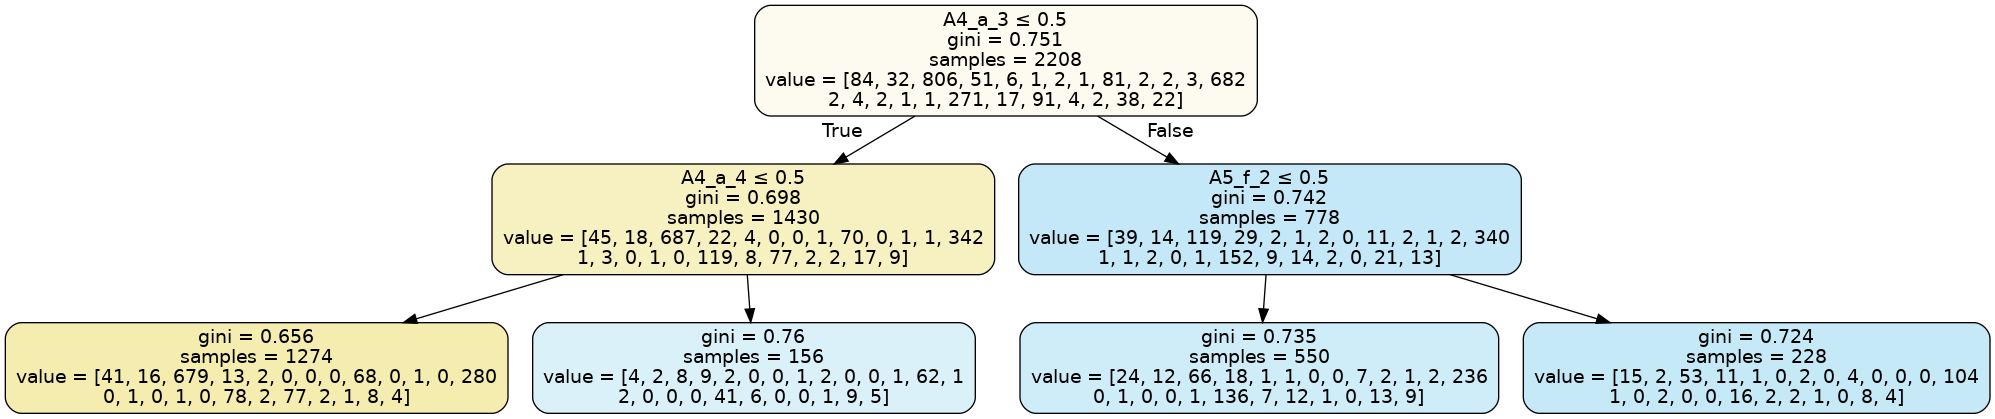

In [ ]:
#tree.plot_tree(clf)
from six import StringIO 
from IPython.display import Image  
import pydotplus
from sklearn.tree import export_graphviz
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('features.png')
Image(graph.create_png())

In [38]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=50, min_samples_leaf=20)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4952481520591341
